# Prediction Using Supervised Learning
                                                                                             -Author: Utkarsh Thakur

## Problem Definition
 - Predicting the Percentage of a student Based on the given number of hoursthe student has studied.
 - What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?
 
## Data
 - The original data is taken from - http://bit.ly/w-data
 
## Algorithm Used
 - Linear Regression

### Preparing The Tools

In [20]:
# importing the required libraries
import pandas as pd
import numpy as np

# for data visualization/exploration
import matplotlib.pyplot as plt 
import seaborn as sns

# model buliding/training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Model Evaluation
from sklearn.metrics import mean_absolute_error

### Loading our data

In [4]:
df = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Explroration and Visualization

In [5]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#Checking f0r Null values
df.isnull == True

False

There is no Null value in our data

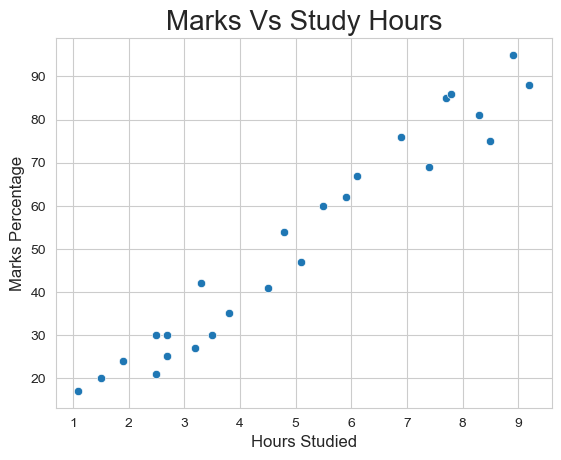

In [11]:
sns.set_style('whitegrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

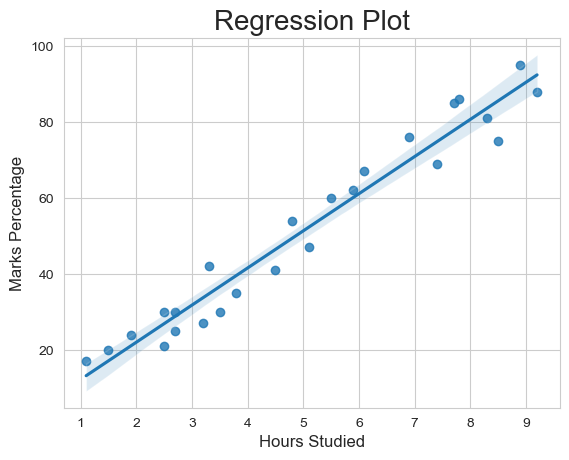

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [12]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())

### Model Training

In [15]:
#Splitting Our Data into Training data and Test data
#Defining X and y from the Data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [16]:
#Fitting our data into the Model
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

In [17]:
#Predicitng the Percentage of the Student
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [18]:
#Comparing the Predicted Marks with the Actual Marks
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


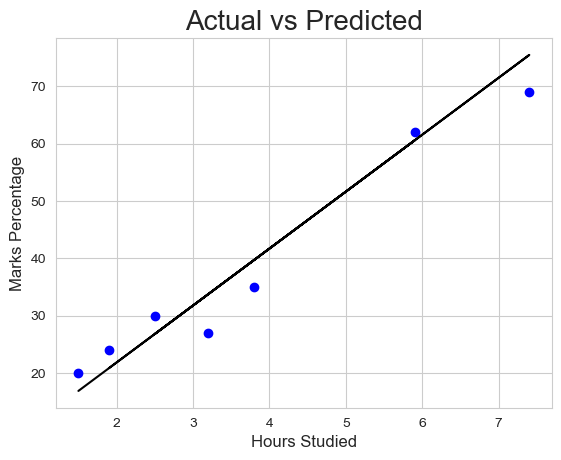

In [19]:
plt.scatter(x=val_X,color =  y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Model Evaluation

In [21]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [22]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.

## Thank You